In [2]:
import tensorflow as tf
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import warnings

# Make NumPy printouts easier to read.
np.set_printoptions(precision=5, suppress=True)
warnings.filterwarnings("ignore")

print(tf.__version__)


2.15.0


In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  0


In [4]:
def build_and_compile_model_input(k):
      model = tf.keras.models.Sequential([
          tf.keras.layers.Dense(128, activation='relu', input_shape=(k,)),
          tf.keras.layers.Dense(64, activation='relu'),
          tf.keras.layers.Dense(128, activation='relu'),
          tf.keras.layers.Dense(1,activation='linear') 
    ])

      model.compile(optimizer=tf.optimizers.Adam(learning_rate=0.01),
                    loss="mse",
                    metrics=['mae'])
      return model

EPOCHS = 5

DATASET=pd.read_csv('data_nowe/dane_scalone_wybrane.csv')


MODEL A - DANE BEZ PORY ROKU

In [5]:
dataset = DATASET
dataset

,Pora_roku,Dzien_tygodnia,Czas_dnia,Przeplyw
0,2.0,1.0,0.000000,0.0
1,2.0,1.0,0.000694,0.0
2,2.0,1.0,0.001389,0.0
3,2.0,1.0,0.002083,0.0
4,2.0,1.0,0.002778,0.0
...,...,...,...,...
2096635,1.0,7.0,0.996528,0.0
2096636,1.0,7.0,0.997222,0.0
2096637,1.0,7.0,0.997917,0.0
2096638,1.0,7.0,0.998611,0.0


In [83]:
dataset=dataset.drop(columns="Pora_roku")
dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model =build_and_compile_model_input(2)

In [84]:
model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

Epoch 1/5
13104/13104 [==============================] - 12s 859us/step - loss: 0.7451 - mae: 0.1680
Epoch 2/5
13104/13104 [==============================] - 11s 859us/step - loss: 0.7045 - mae: 0.1641
Epoch 3/5
13104/13104 [==============================] - 11s 857us/step - loss: 0.7045 - mae: 0.1640
Epoch 4/5
13104/13104 [==============================] - 11s 849us/step - loss: 0.7045 - mae: 0.1640
Epoch 5/5
13104/13104 [==============================] - 11s 848us/step - loss: 0.7045 - mae: 0.1640


In [85]:
model.evaluate(x_test, y_test, batch_size=128)

3276/3276 [==============================] - 2s 649us/step - loss: 0.7077 - mae: 0.1594


[0.7077369689941406, 0.15943662822246552]

113/113 [==============================] - 0s 613us/step


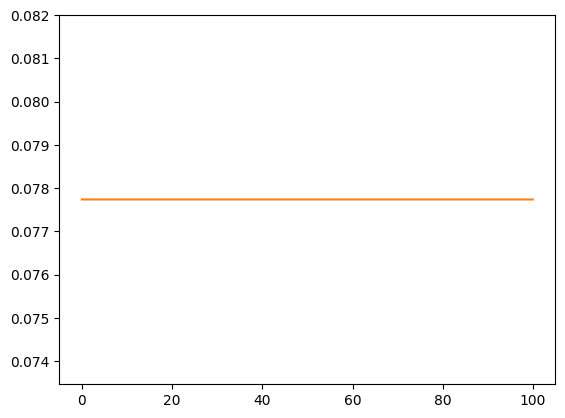

In [86]:
flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)

plt.plot(flow_time, flow_result)

MODEL B - TYLKO JEDEN DZIEŃ TYGODANIA


In [87]:


def prep_data(data,day):
      data=data.drop(columns="Pora_roku")
      data = data[data['Dzien_tygodnia'] == day]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      x=x.drop(columns="Dzien_tygodnia")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      return [x,y]

PONIEDZIAŁEK

Epoch 1/5
1872/1872 [==============================] - 2s 849us/step - loss: 1.2314 - mae: 0.2122
Epoch 2/5
1872/1872 [==============================] - 2s 843us/step - loss: 0.8364 - mae: 0.1881
Epoch 3/5
1872/1872 [==============================] - 2s 854us/step - loss: 0.8383 - mae: 0.1891
Epoch 4/5
1872/1872 [==============================] - 2s 882us/step - loss: 0.8367 - mae: 0.1874
Epoch 5/5
113/113 [==============================] - 0s 623us/step


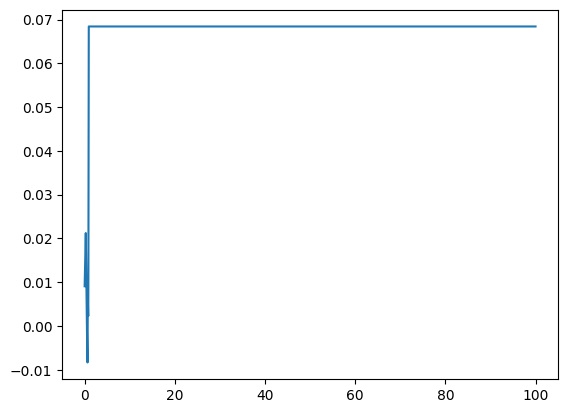

In [88]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pon=np.arange(0,100,100/3600) 
flow_result_pon = model.predict(flow_time_pon).T

plt.plot(flow_time_pon, flow_result_pon.reshape(3600))

WTOREK

Epoch 1/5
1872/1872 [==============================] - 2s 877us/step - loss: 0.7591 - mae: 0.1707
Epoch 2/5
1872/1872 [==============================] - 2s 868us/step - loss: 0.6320 - mae: 0.1484
Epoch 3/5
1872/1872 [==============================] - 2s 864us/step - loss: 0.6545 - mae: 0.1563
Epoch 4/5
1872/1872 [==============================] - 2s 861us/step - loss: 0.6317 - mae: 0.1485
Epoch 5/5
113/113 [==============================] - 0s 595us/step


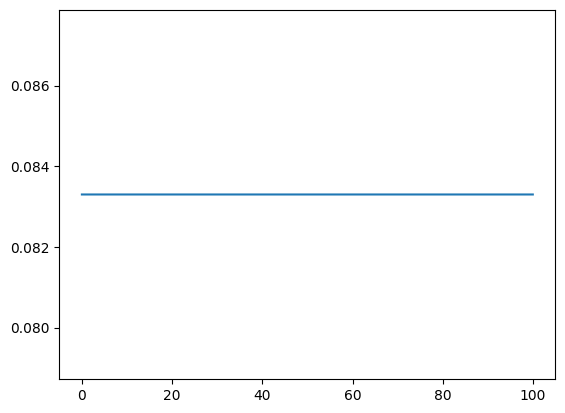

In [89]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_wt=np.arange(0,100,100/3600) 
flow_result_wt = model.predict(flow_time_wt)

plt.plot(flow_time_wt, flow_result_wt.reshape(3600))

ŚRODA

Epoch 1/5
1872/1872 [==============================] - 2s 853us/step - loss: 0.8702 - mae: 0.1879
Epoch 2/5
1872/1872 [==============================] - 2s 843us/step - loss: 0.7322 - mae: 0.1702
Epoch 3/5
1872/1872 [==============================] - 2s 869us/step - loss: 0.7321 - mae: 0.1697
Epoch 4/5
1872/1872 [==============================] - 2s 879us/step - loss: 0.7695 - mae: 0.1772
Epoch 5/5
113/113 [==============================] - 0s 658us/step


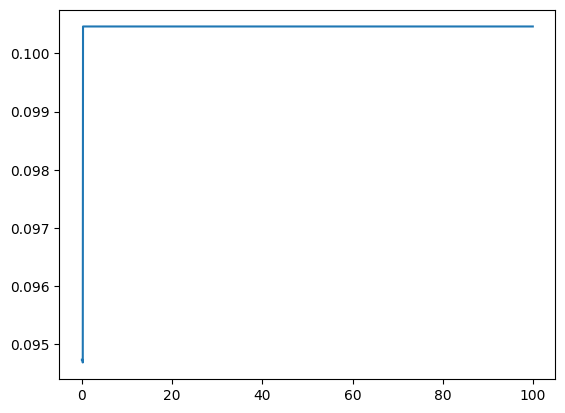

In [90]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sr=np.arange(0,100,100/3600)  
flow_result_sr = model.predict(flow_time_sr)   

plt.plot(flow_time_sr, flow_result_sr.reshape(3600))

CZWARTEK

Epoch 1/5
1872/1872 [==============================] - 2s 891us/step - loss: 0.8073 - mae: 0.1809
Epoch 2/5
1872/1872 [==============================] - 2s 869us/step - loss: 0.6947 - mae: 0.1598
Epoch 3/5
1872/1872 [==============================] - 2s 849us/step - loss: 0.6943 - mae: 0.1599
Epoch 4/5
1872/1872 [==============================] - 2s 896us/step - loss: 0.6941 - mae: 0.1608
Epoch 5/5
113/113 [==============================] - 0s 597us/step


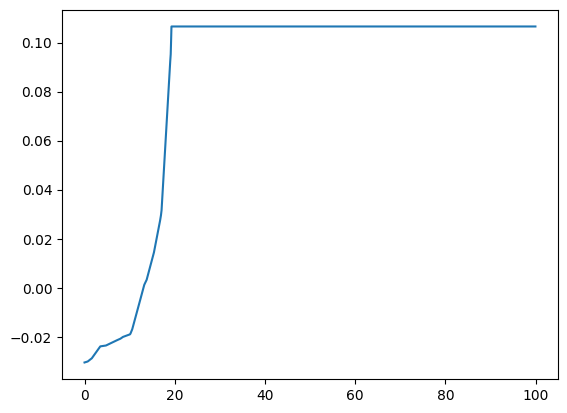

In [91]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_czw=np.arange(0,100,100/3600) 
flow_result_czw = model.predict(flow_time_czw)   

plt.plot(flow_time_czw, flow_result_czw.reshape(3600))

PIĄTEK

Epoch 1/5
1872/1872 [==============================] - 2s 870us/step - loss: 0.8474 - mae: 0.1954
Epoch 2/5
1872/1872 [==============================] - 2s 861us/step - loss: 0.6389 - mae: 0.1615
Epoch 3/5
1872/1872 [==============================] - 2s 851us/step - loss: 0.6391 - mae: 0.1611
Epoch 4/5
1872/1872 [==============================] - 2s 872us/step - loss: 0.6439 - mae: 0.1657
Epoch 5/5
113/113 [==============================] - 0s 624us/step


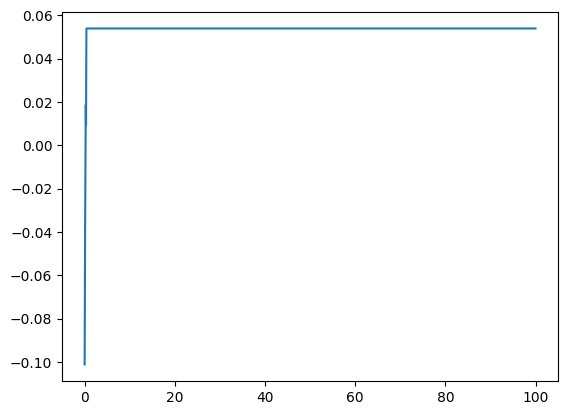

In [92]:
dataset = DATASET

[x,y]=prep_data(dataset,5)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_pt=np.arange(0,100,100/3600)  
flow_result_pt = model.predict(flow_time_pt)   

plt.plot(flow_time_pt, flow_result_pt.reshape(3600))

SOBOTA

Epoch 1/5
1872/1872 [==============================] - 2s 893us/step - loss: 0.8011 - mae: 0.1683
Epoch 2/5
1872/1872 [==============================] - 2s 849us/step - loss: 0.5806 - mae: 0.1428
Epoch 3/5
1872/1872 [==============================] - 2s 853us/step - loss: 0.5816 - mae: 0.1440
Epoch 4/5
1872/1872 [==============================] - 2s 849us/step - loss: 0.5965 - mae: 0.1498
Epoch 5/5
113/113 [==============================] - 0s 599us/step


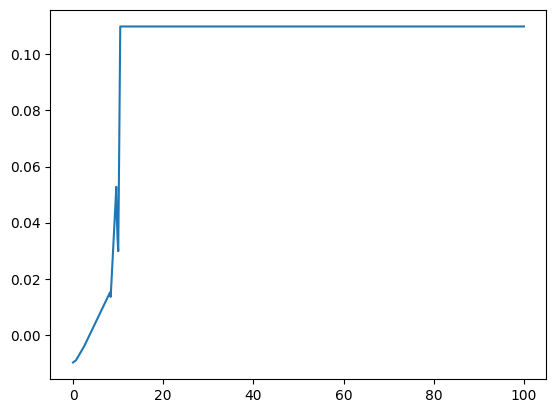

In [93]:
dataset = DATASET

[x,y]=prep_data(dataset,6)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_sob=np.arange(0,100,100/3600) 
flow_result_sob = model.predict(flow_time_sob)   

plt.plot(flow_time_sob, flow_result_sob.reshape(3600))

NIEDZIELA

Epoch 1/5
3744/3744 [==============================] - 3s 765us/step - loss: 0.9155 - mae: 0.1955
Epoch 2/5
3744/3744 [==============================] - 3s 776us/step - loss: 0.8357 - mae: 0.1857
Epoch 3/5
3744/3744 [==============================] - 3s 771us/step - loss: 0.8357 - mae: 0.1858
Epoch 4/5
3744/3744 [==============================] - 3s 769us/step - loss: 0.8358 - mae: 0.1860
Epoch 5/5
113/113 [==============================] - 0s 594us/step


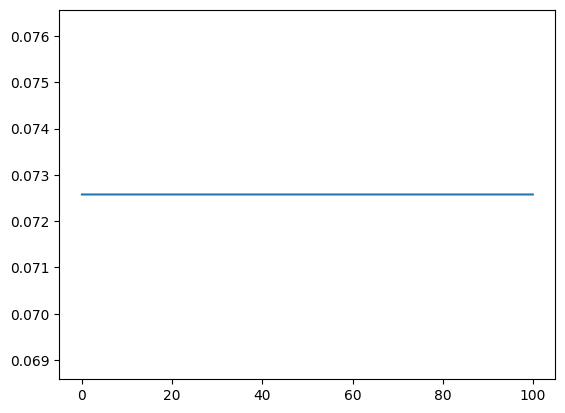

In [94]:
dataset = DATASET

[x,y]=prep_data(dataset,7)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(1)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=64)

flow_time_dn=np.arange(0,100,100/3600) 
flow_result_dn = model.predict(flow_time_dn)   

plt.plot(flow_time_dn, flow_result_dn.reshape(3600))

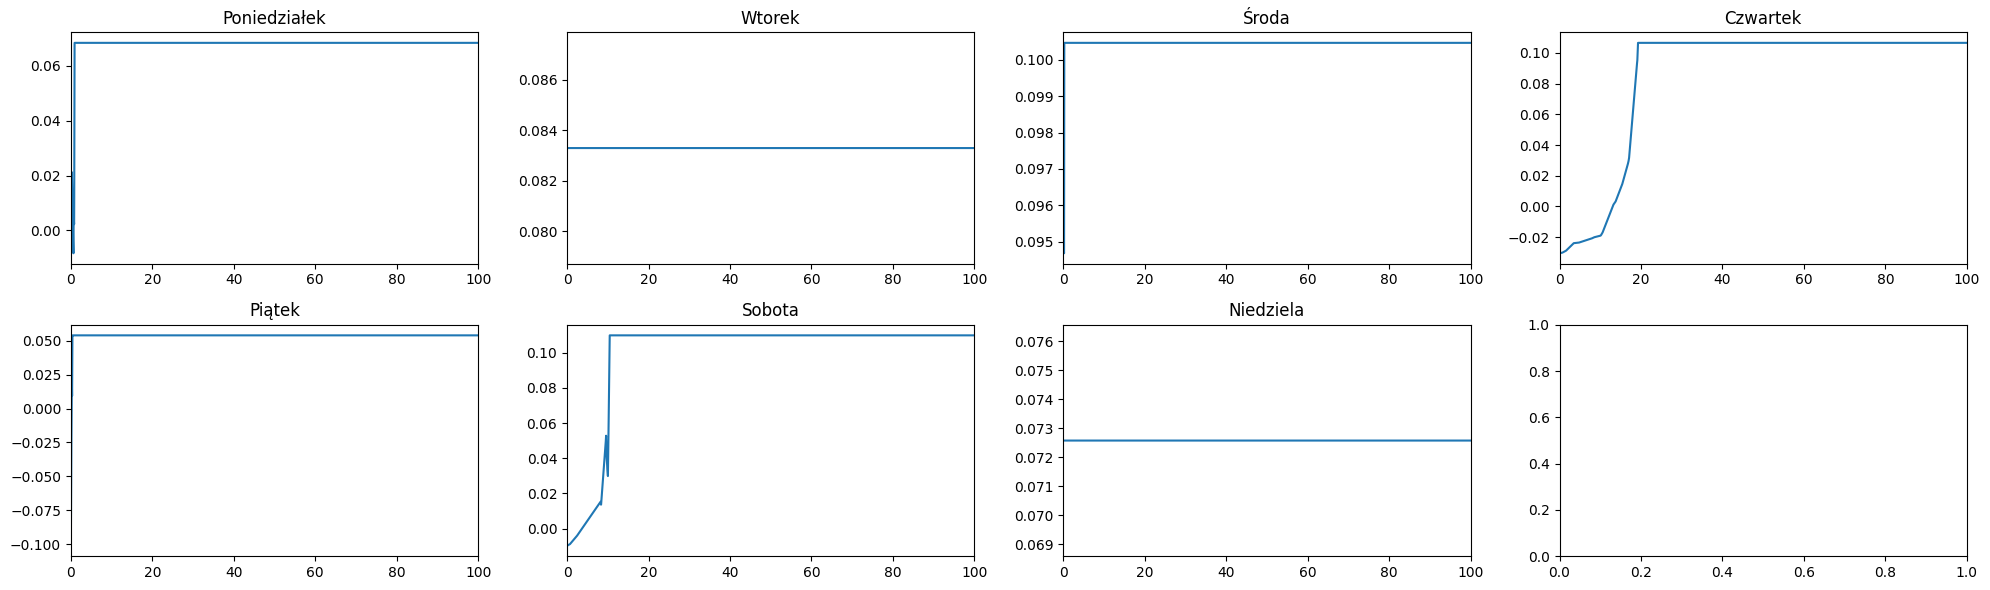

In [95]:
fig, axs = plt.subplots(2, 4, figsize=(20, 6))


axs[0,0].plot(flow_time_pon, flow_result_pon.reshape(3600))
axs[0,0].set_title('Poniedziałek')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_wt, flow_result_wt.reshape(3600))
axs[0,1].set_title('Wtorek')
axs[0,1].set_xlim(0, 100)

axs[0,2].plot(flow_time_sr, flow_result_sr.reshape(3600))
axs[0,2].set_title('Środa')
axs[0,2].set_xlim(0, 100)

axs[0,3].plot(flow_time_czw, flow_result_czw.reshape(3600))
axs[0,3].set_title('Czwartek')
axs[0,3].set_xlim(0, 100)

axs[1,0].plot(flow_time_pt, flow_result_pt.reshape(3600))
axs[1,0].set_title('Piątek')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_sob, flow_result_sob.reshape(3600))
axs[1,1].set_title('Sobota')
axs[1,1].set_xlim(0, 100)

axs[1,2].plot(flow_time_dn, flow_result_dn.reshape(3600))
axs[1,2].set_title('Niedziela')
axs[1,2].set_xlim(0, 100)

plt.tight_layout()

plt.show()

MODEL C - DODANIE PORY ROKU

In [96]:
def prep_data(data,sezon):
      data = data[data['Pora_roku'] == sezon]

      data['Czas_dnia'] = data['Czas_dnia'] * 100
      x=data.drop(columns="Przeplyw")
      y=data.drop(columns="Dzien_tygodnia")
      y=y.drop(columns="Czas_dnia")
      y=y.drop(columns="Pora_roku")
      return [x,y]

WSZYSTKIE PORY ROKU

Epoch 1/5
13104/13104 [==============================] - 12s 859us/step - loss: 0.7350 - mae: 0.1673
Epoch 2/5
13104/13104 [==============================] - 11s 845us/step - loss: 0.7045 - mae: 0.1640
Epoch 3/5
13104/13104 [==============================] - 11s 852us/step - loss: 0.7045 - mae: 0.1641
Epoch 4/5
13104/13104 [==============================] - 11s 852us/step - loss: 0.7045 - mae: 0.1640
Epoch 5/5
113/113 [==============================] - 0s 589us/step


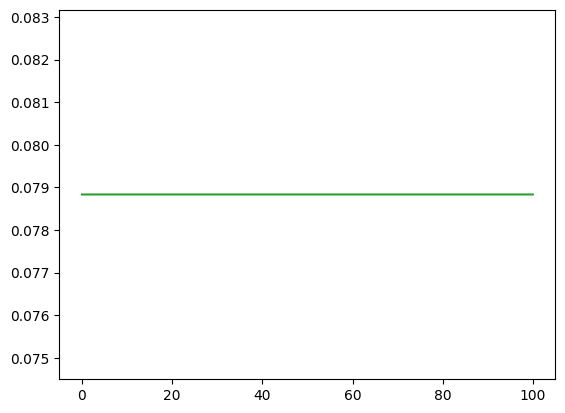

In [97]:
dataset = DATASET


dataset['Czas_dnia'] = dataset['Czas_dnia'] * 100
x=dataset.drop(columns="Przeplyw")
y=dataset.drop(columns="Dzien_tygodnia")
y=y.drop(columns="Czas_dnia")
y=y.drop(columns="Pora_roku")

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


model = build_and_compile_model_input(3)


model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time=np.arange(0,100,100/3600) 
flow_time=np.vstack((1*np.ones_like(flow_time, dtype=int),1*np.ones_like(flow_time, dtype=int),flow_time)).T
flow_result = model.predict(flow_time)   

plt.plot(flow_time, flow_result)

WIOSNA

Epoch 1/5
3276/3276 [==============================] - 3s 871us/step - loss: 0.8390 - mae: 0.1912
Epoch 2/5
3276/3276 [==============================] - 3s 856us/step - loss: 0.7604 - mae: 0.1796
Epoch 3/5
3276/3276 [==============================] - 3s 864us/step - loss: 0.7604 - mae: 0.1791
Epoch 4/5
3276/3276 [==============================] - 3s 864us/step - loss: 0.7616 - mae: 0.1781
Epoch 5/5
113/113 [==============================] - 0s 613us/step


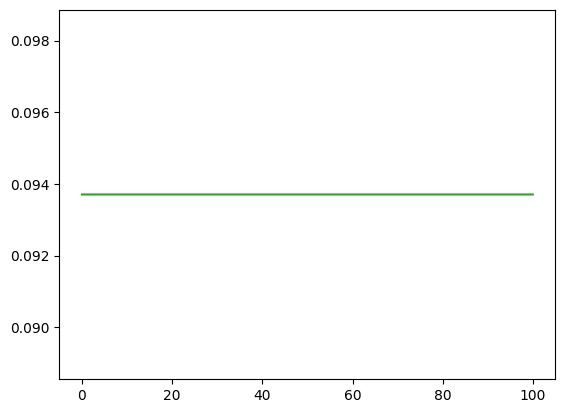

In [98]:
dataset = DATASET

[x,y]=prep_data(dataset,1)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_spring=np.arange(0,100,100/3600) 
flow_time_spring=np.vstack((1*np.ones_like(flow_time_spring, dtype=int),1*np.ones_like(flow_time_spring, dtype=int),flow_time_spring)).T
flow_result_spring = model.predict(flow_time_spring)   

plt.plot(flow_time_spring, flow_result_spring)

LATO

Epoch 1/5
3276/3276 [==============================] - 3s 844us/step - loss: 0.5355 - mae: 0.1433
Epoch 2/5
3276/3276 [==============================] - 3s 849us/step - loss: 0.4861 - mae: 0.1315
Epoch 3/5
3276/3276 [==============================] - 3s 835us/step - loss: 0.4860 - mae: 0.1316
Epoch 4/5
3276/3276 [==============================] - 3s 840us/step - loss: 0.4861 - mae: 0.1315
Epoch 5/5
113/113 [==============================] - 0s 624us/step


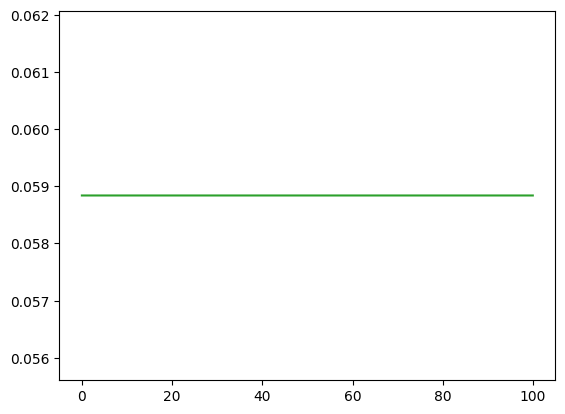

In [99]:
dataset = DATASET

[x,y]=prep_data(dataset,2)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_summer=np.arange(0,100,100/3600) 
flow_time_summer=np.vstack((2*np.ones_like(flow_time_summer, dtype=int),1*np.ones_like(flow_time_summer, dtype=int),flow_time_summer)).T
flow_result_summer = model.predict(flow_time_summer)   

plt.plot(flow_time_summer, flow_result_summer)

JESIEŃ

Epoch 1/5
3276/3276 [==============================] - 3s 826us/step - loss: 0.7770 - mae: 0.1702
Epoch 2/5
3276/3276 [==============================] - 3s 832us/step - loss: 0.6573 - mae: 0.1570
Epoch 3/5
3276/3276 [==============================] - 3s 828us/step - loss: 0.6572 - mae: 0.1574
Epoch 4/5
3276/3276 [==============================] - 3s 833us/step - loss: 0.6572 - mae: 0.1572
Epoch 5/5
113/113 [==============================] - 0s 570us/step


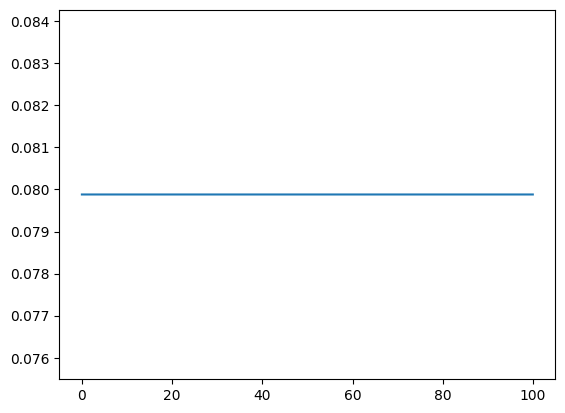

In [100]:
dataset = DATASET

[x,y]=prep_data(dataset,3)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_fall_plot=np.arange(0,100,100/3600) 
flow_time_fall=np.vstack((3*np.ones_like(flow_time_fall_plot, dtype=int),1*np.ones_like(flow_time_fall_plot, dtype=int),flow_time_fall_plot)).T
flow_result_fall = model.predict(flow_time_fall)   

plt.plot(flow_time_fall_plot, flow_result_fall)

ZIMA

Epoch 1/5
3276/3276 [==============================] - 3s 834us/step - loss: 0.9856 - mae: 0.2018
Epoch 2/5
3276/3276 [==============================] - 3s 836us/step - loss: 0.9200 - mae: 0.1924
Epoch 3/5
3276/3276 [==============================] - 3s 826us/step - loss: 0.9199 - mae: 0.1922
Epoch 4/5
3276/3276 [==============================] - 3s 825us/step - loss: 0.9199 - mae: 0.1924
Epoch 5/5
113/113 [==============================] - 0s 561us/step


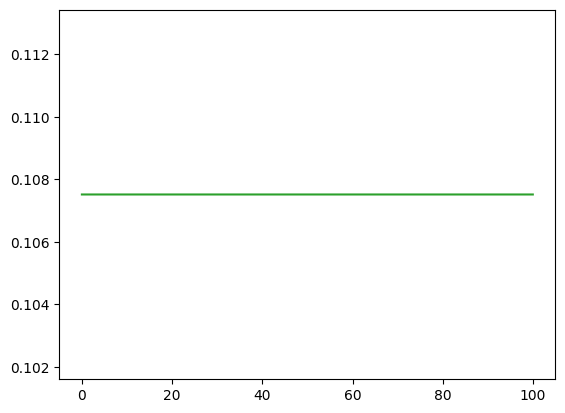

In [101]:
dataset = DATASET

[x,y]=prep_data(dataset,4)

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

model = build_and_compile_model_input(3)

model.fit(x_train, y_train, epochs=EPOCHS, batch_size=128)

flow_time_winter=np.arange(0,100,100/3600) 
flow_time_winter=np.vstack((4*np.ones_like(flow_time_winter, dtype=int),1*np.ones_like(flow_time_winter, dtype=int),flow_time_winter)).T
flow_result_winter = model.predict(flow_time_winter)   

plt.plot(flow_time_winter, flow_result_winter)

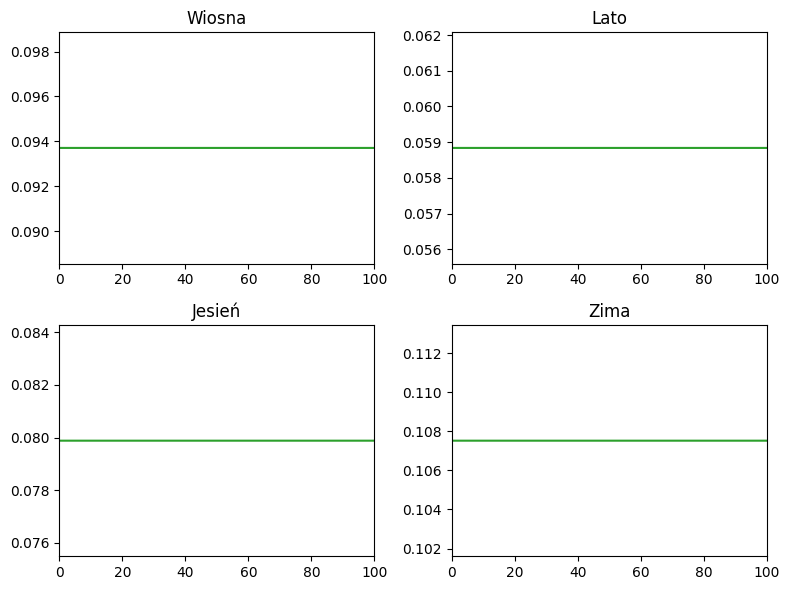

In [102]:
fig, axs = plt.subplots(2, 2, figsize=(8, 6))


axs[0,0].plot(flow_time_spring, flow_result_spring)
axs[0,0].set_title('Wiosna')
axs[0,0].set_xlim(0, 100)

axs[0,1].plot(flow_time_summer, flow_result_summer)
axs[0,1].set_title('Lato')
axs[0,1].set_xlim(0, 100)

axs[1,0].plot(flow_time_fall, flow_result_fall)
axs[1,0].set_title('Jesień')
axs[1,0].set_xlim(0, 100)

axs[1,1].plot(flow_time_winter, flow_result_winter)
axs[1,1].set_title('Zima')
axs[1,1].set_xlim(0, 100)

plt.tight_layout()

plt.show()